<a href="https://colab.research.google.com/github/crystaljwang/tm10007_group_3/blob/preprocessing/ML_Geanne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics


In [5]:

# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git


# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git

%cd /content/tm10007_ml/worcgist 

dir = Path('.') / 'GIST_radiomicFeatures.csv'
data = pd.read_csv(dir, index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

  Preparing metadata (setup.py) ... done
Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 61
Unpacking objects: 100% (83/83), 67.93 MiB | 13.70 MiB/s, done.
/content/tm10007_ml/worcgist
The number of samples: 246
The number of columns: 494


In [ ]:
##DATA INFORMATION



In [80]:
##PREPROCESSING

# Replace label values from string to binary
data['label'] = data['label'].replace({'GIST': 1, 'non-GIST': 0})

# Separate the features and labels
X = data.drop(['label'], axis=1)
y = data['label']


In [81]:
##TRAIN-TEST SET

# Split the data into training and testing sets
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)

In [82]:
##SCALING

# Data scaling
scaler = MinMaxScaler()  #define scaler
# scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)  #fit scaler on train set
X_val = scaler.transform(X_val)  #apply fitted scaler on validation set
X_test = scaler.transform(X_test)  #apply fitted scaler on test set

In [83]:
# ----- FEATURE SELECTION -----
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Remove all constant (zero-variance) features
X_train = pd.DataFrame(X_train)
zero_var_filter = VarianceThreshold(threshold=0)

#fit on train data
zero_var_filter.fit(X_train)
zero_var_columns = [column for column in X_train.columns if column not in X_train.columns[zero_var_filter.get_support()]]

#apply on validation and test data
X_train = zero_var_filter.transform(X_train)
X_val = zero_var_filter.transform(X_val)
X_test = zero_var_filter.transform(X_test)

#make print of features removed
# removed_features = [data.columns[index] for index in zero_var_columns]
# print('The following constant features were removed:')
# for feature in removed_features:
#     print(f'- {feature}')




In [73]:
X_train.shape

(166, 474)

In [36]:
##FEATURE SELECTION

# Perform feature selection on the training set
selector = SelectKBest(f_classif, k=30)
X_train = selector.fit_transform(X_train, y_train)

# Apply the same feature selection to the test & validation set
X_val = selector.transform(X_val)
X_test = selector.transform(X_test)


Shape before PCA:  (166, 474)
Shape after PCA:  (166, 49)


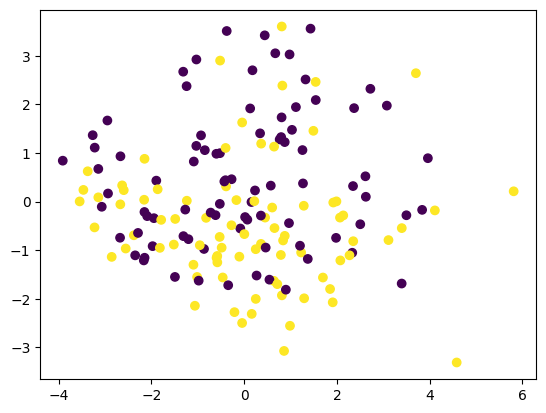

In [84]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(X_train)

print('Shape before PCA: ', X_train.shape)
print('Shape after PCA: ', pca_features.shape)

import matplotlib.pyplot as plt
plt.scatter(pca_features[:,0],pca_features[:,1], c=y_train) 
plt.show()

In [53]:
##CLASSIFIERS

# Prepare pipeline
model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter = 1000))
model_pipeline.append(SVC())
model_pipeline.append(LinearSVC())
model_pipeline.append(KNeighborsClassifier(n_neighbors=20))
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

model_list = ['LogisticRegression', 'SVC', 'Linear SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

# Execute pipeline
for model in model_pipeline:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  acc_list.append(metrics.accuracy_score(y_val, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_val, y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr),2))
  cm_list.append(confusion_matrix(y_val, y_pred))



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [90]:
##Hyperparameters KNN classifier

import numpy as np
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import svm

pipeline = Pipeline(
    [
     ('selector',SelectKBest()),
     ('model', KNeighborsClassifier())
    ]
)
     
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':list(range(1,51,2)) , 
                  'model__n_neighbors': list(range(1,51,2)), 
                  'model__weights': ['uniform', 'distance'],
                  'model__metric': ['euclidean', 'manhattan', 'minkowski']},
    scoring="roc_auc",
    cv=5,
    verbose=3,
    n_jobs=-1)

search.fit(X_train,y_train)
print(search.best_params_)



Fitting 5 folds for each of 3750 candidates, totalling 18750 fits
{'model__metric': 'euclidean', 'model__n_neighbors': 41, 'model__weights': 'uniform', 'selector__k': 49}


In [101]:
print(search.best_params_)
print(search.best_score_)

y_pred = search.predict(X_val)
acc = (metrics.accuracy_score(y_val, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_val, y_pred)
auc = (round(metrics.auc(fpr, tpr),2))

print(auc)
print(acc)



0.7123918685121107
0.53
0.5333333333333333


In [ ]:
##VALIDATION
# Plot Model validation
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,LogisticRegression,0.566667,0.57
1,SVC,0.566667,0.57
2,Linear SVC,0.533333,0.53
3,KNN,0.633333,0.63
4,Decision Tree,0.500000,0.50
5,Random Forest,0.566667,0.57
6,Naive Bayes,0.566667,0.57


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/MyDrive/Github/TM10007_ML/worcgist

# # Data loading functions. Uncomment the one you want to use
# from load_data import load_data
# #from worclipo.load_data import load_data
# #from worcliver.load_data import load_data
# #from ecg.load_data import load_data


# #load data
# data = load_data()
# print(f'The number of samples: {len(data.index)}')
# print(f'The number of columns: {len(data.columns)}')
# data.info()


In [ ]:
##FEATURE SELECTION
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression(max_iter=1000)
#clf = KNeighborsClassifier()
cv = StratifiedKFold(5)


rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv.fit(X_train, y_train)
# X_test = rfecv.transform(X_test) # Apply the same feature selection to the test set

print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

# Initialize the k-fold and set the number of splits
kf = KFold(n_splits=5)

# Initialize model for each fold
models = []
for train_index, test_index in kf.split(X_train):
    X_train2, X_val = X_train[train_index], X_train[test_index]
    y_train2, y_val = y_train[train_index], y_train[test_index]
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train2, y_train2)
    models.append(model)

# Combine the models using the voting technique
ensemble = VotingClassifier(estimators=[('model'+str(i+1), models[i]) for i in range(len(models))], voting='hard')

# Make predictions on the test set using the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_val)

# Evaluate the performance of the ensemble model
acc = metrics.accuracy_score(y_val, y_pred)
fpr, tpr, _thresholds = metrics.roc_curve(y_val, y_pred)
auc = round(metrics.auc(fpr, tpr),2)

print('Accuracy:', acc)
print('AUC:', auc)

Accuracy: 0.48484848484848486
AUC: 0.5


In [ ]:
##k-fold validation
from sklearn.model_selection import StratifiedKFold

# Initialize the k-fold and set the number of splits
kf = StratifiedKFold(n_splits=5)

model = LogisticRegression(max_iter=1000)
acc_list = []
auc_list = []
cm_list = []

# Split the data into training and testing sets
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_val = X_train[train_index], X_train[test_index] #features for training  and testing 
    y_train2, y_val = y_train[train_index], y_train[test_index] # targets for training and testing 
    model.fit(X_train2, y_train2)
    y_pred = model.predict(X_val)
    acc_list.append(metrics.accuracy_score(y_val, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_val, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_val, y_pred))


##VALIDATION
# Plot Model validation
result_df = pd.DataFrame({'Accuracy': acc_list, 'AUC': auc_list})
print(result_df)

print(f"Min Accuracy is {min(acc_list)} and Max Accuracy is {max(acc_list)}")
print(f"Min AUC is {min(auc_list)} and Max AUC is {max(auc_list)}")

##final Validation


